# Spatio-temporal example

In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
import gpflow

from gpflow import default_float
from gpflow.ci_utils import ci_niter

gpflow.config.set_default_float(np.float64)
gpflow.config.set_default_jitter(1e-4)
gpflow.config.set_default_summary_fmt("notebook")
# convert to float64 for tfp to play nicely with gpflow in 64
f64 = gpflow.utilities.to_default_float

f64 = gpflow.utilities.to_default_float

np.random.seed(1000)

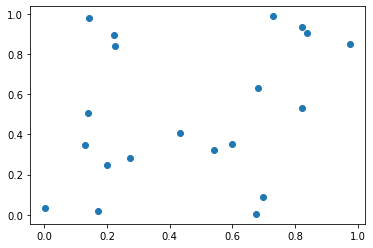

In [26]:
sensor_lat = np.random.uniform(size = (20, 1), )
sensor_long = np.random.uniform(size = (20, 1))
plt.scatter(sensor_lat, sensor_long)

In [29]:
sensor_locs = np.concatenate((sensor_lat, sensor_long), 1)
sensor_locs

array([[0.1309211 , 0.34540489],
       [0.14011599, 0.50857829],
       [0.20056862, 0.24750605],
       [0.72982855, 0.98759226],
       [0.43195895, 0.40893494],
       [0.69853328, 0.0861166 ],
       [0.14155456, 0.98114044],
       [0.22393746, 0.89662233],
       [0.82282753, 0.53319582],
       [0.00381209, 0.03514239],
       [0.22642668, 0.83771878],
       [0.83756058, 0.90390791],
       [0.6797116 , 0.63034084],
       [0.27394295, 0.28100079],
       [0.82141707, 0.93270378],
       [0.17053519, 0.01791405],
       [0.54227727, 0.32063769],
       [0.59911175, 0.35118622],
       [0.97375601, 0.84920097],
       [0.67379593, 0.0043367 ]])

In [34]:
time = np.linspace(1, 200, 200)
time

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [35]:
def f(X):
    '''Takes 3 dimensional X array and returns Y.
    
    Let the dimensions of X be latitude, longitude and time respectively'''
    f = 1/(np.sqrt((X[:,0]-0.25)**2 + (X[:,1]-0.5)**2) + 1) * (np.sin(X[:,2])+1)
    return f

In [ ]:
X = 